In [1]:
import nltk
from konlpy.tag import Hannanum
import pandas as pd
from time import sleep
import datetime 

In [178]:
? rc

In [2]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib notebook

In [3]:
df1 = pd.read_csv("./4th2.csv", encoding = "utf-8")
d2 = df1.groupby("날짜").size()

In [4]:
df2 = pd.read_csv("./new/final_it.csv", encoding = "utf-8")

In [5]:
df3 = pd.read_csv("./4thIndustry.csv", encoding = "utf-8")

In [6]:
l = df2["Date"]
l2 = []
for i in l:
    d = i[:-3].replace(" ", "")
    l2.append(d)
df2["날짜2"] = l2

In [7]:
df2['date1'] = df2["날짜2"].apply(lambda x: datetime.datetime.strptime(x, '%Y.%m.%d'))

In [8]:
df3['date1'] = df3["Date"].apply(lambda x: datetime.datetime.strptime(x, '%Y.%m.%d'))

In [9]:
df1['date1'] = df1["날짜"].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
df2.head()

,Unnamed: 0,Title,Date,날짜2,date1
0,0,[기자의 視角] 외면당하는 택시 업계 '투쟁',2018. 10. 16 (화),2018.10.16,2018-10-16
1,1,"[社說] ""진보진영은 어째서 한 글자도 못 고치게 하는지 모르겠다""",2018. 10. 8 (월),2018.10.8,2018-10-08
2,2,바이오·화장품뷰티·태양광 등 6대 신성장산업 적극 육성… 4차산업혁명 선도한다,2018. 9. 28 (금),2018.9.28,2018-09-28
3,3,[뉴스 TALK] 출범 1년 4차산업혁명위 초라한 성적표,2018. 9. 28 (금),2018.9.28,2018-09-28
4,4,"[기고] ""국가는 이제라도 강호축에 관심갖고 대책 마련해야""",2018. 9. 28 (금),2018.9.28,2018-09-28


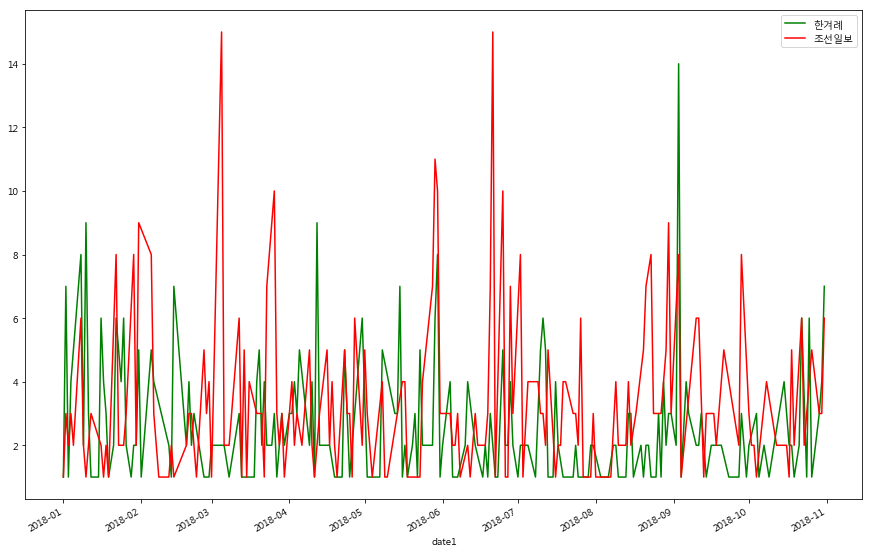

In [11]:
plt.figure(figsize =(15, 10))
df3.groupby("date1").size().plot(color = "g")
df2.groupby("date1").size().plot(color = "r")
plt.legend(("한겨례", "조선일보"))

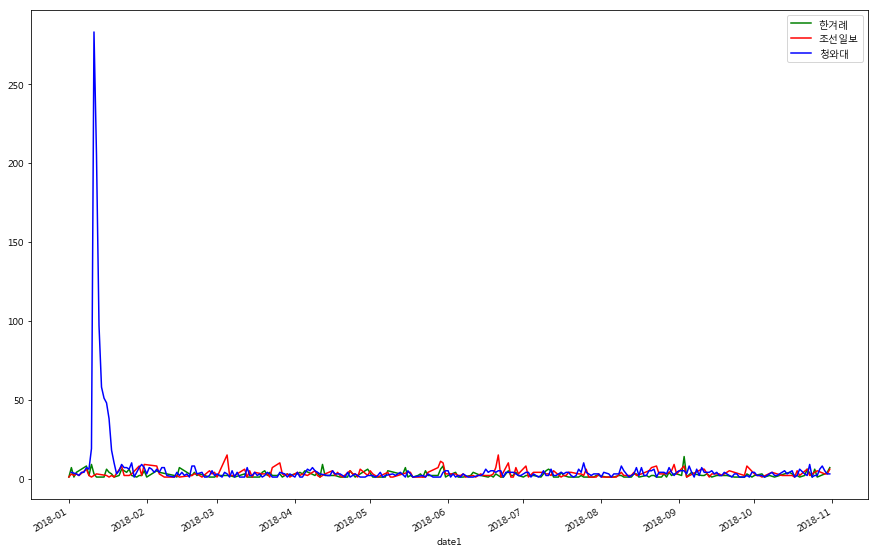

In [12]:
plt.figure(figsize =(15, 10))
df3.groupby("date1").size().plot(color = "g")
df2.groupby("date1").size().plot(color = "r")
df1.groupby("date1").size().plot(color = "b")
plt.legend(("한겨례", "조선일보", "청와대"))

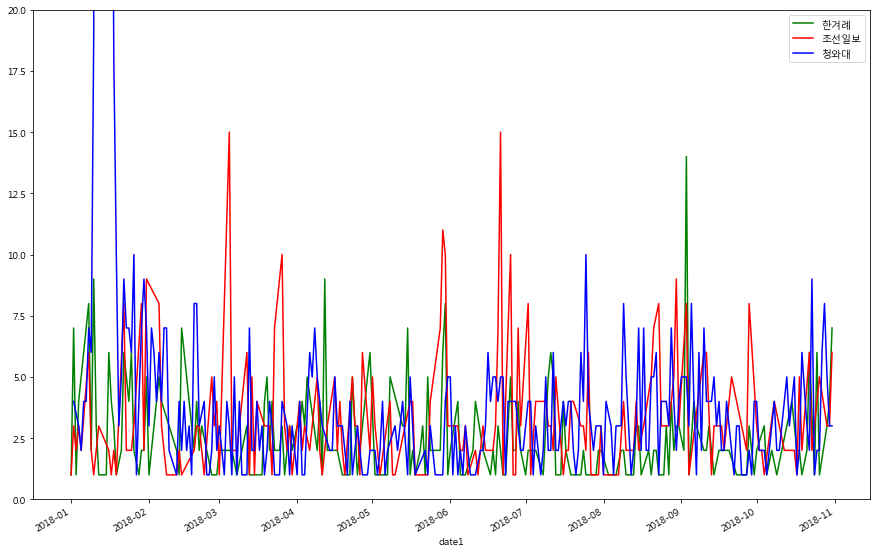

In [13]:
plt.figure(figsize =(15, 10))
df3.groupby("date1").size().plot(color = "g")
df2.groupby("date1").size().plot(color = "r")
df1.groupby("date1").size().plot(color = "b")
plt.ylim(0, 20)
plt.legend(("한겨례", "조선일보", "청와대"))

In [14]:
dfhan = pd.read_csv("./new/df_industrycommon.csv", encoding = "euc-kr")
dfcho = pd.read_csv("./new/cho_it.csv", encoding = "euc-kr")
dfchung = pd.read_csv("4th_nouns_stop.csv", encoding="utf-8")

In [15]:
dfcho10 = dfcho[:10]
dfhan10 = dfhan[:10]
dfchung10 = dfchung[:10]

In [28]:
dfcho.drop([1], axis = 0, inplace=True)

KeyError: 'labels [1] not contained in axis'

In [18]:
dfhan.drop([4], axis = 0, inplace=True)

In [19]:
dfhan10["한겨례순위"] = list(range(1, 11))
dfcho10["조선일보순위"] = list(range(1, 11))
dfchung10["청와대순위"] = list(range(1, 11))

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [52]:
dfcho10.columns = ["순", "단어", "조선일보빈도", "조선일보순위"]
dfhan10.columns = ["단어", "한겨례빈도", "한겨례순위"]
dfchung10.columns = ["순", "단어", "청원빈도", "청원순위"]

In [53]:
dfcho10

,순,단어,조선일보빈도,조선일보순위
0,0,4차산업혁명,34,1
1,2,기업,29,2
2,3,개최,18,3
3,4,세계,17,4
4,5,일자리,17,5
5,6,글로벌,16,6
6,7,대학,16,7
7,8,혁신,15,8
8,9,시대,14,9
9,10,교육,13,10


In [54]:
dfall = dfchung10.merge(dfcho10, on= "단어", how = "outer")

In [55]:
dfall = dfall.merge(dfhan10, on = "단어", how = "outer")

In [90]:
dfall

,단어,청원빈도,청원순위,조선일보빈도,조선일보순위,한겨례빈도,한겨례순위
0,가상화폐,103.0,1.0,NaN,NaN,NaN,NaN
1,정부,62.0,2.0,NaN,NaN,14.0,3.0
2,규제,54.0,3.0,NaN,NaN,NaN,NaN
3,청원,41.0,4.0,NaN,NaN,NaN,NaN
4,반대,40.0,5.0,NaN,NaN,NaN,NaN
5,대한민국,38.0,6.0,NaN,NaN,NaN,NaN
6,일자리,32.0,7.0,17.0,5.0,11.0,4.0
7,암호화폐,31.0,8.0,NaN,NaN,NaN,NaN
8,정책,30.0,9.0,NaN,NaN,NaN,NaN
9,개선,29.0,10.0,NaN,NaN,NaN,NaN


In [75]:
dfall.drop(["순_x", "순_y"], axis = 1, inplace=True)
dfall.set_index("단어", inplace=Truw)

KeyError: "labels ['순_x' '순_y'] not contained in axis"

In [76]:
dfrank = dfall.drop(["청원빈도", "조선일보빈도", "한겨례빈도"], axis = 1)

In [77]:
dfnum = dfall.drop(["청원순위", "조선일보순위", "한겨례순위"], axis = 1)


In [83]:
dfnum.set_index("단어", inplace= True)
dfrank.set_index("단어", inplace= True)

In [85]:
dfnum

,청원빈도,조선일보빈도,한겨례빈도
단어,,,
가상화폐,103.0,NaN,NaN
정부,62.0,NaN,14.0
규제,54.0,NaN,NaN
청원,41.0,NaN,NaN
반대,40.0,NaN,NaN
대한민국,38.0,NaN,NaN
일자리,32.0,17.0,11.0
암호화폐,31.0,NaN,NaN
정책,30.0,NaN,NaN


<Figure size 1080x720 with 0 Axes>

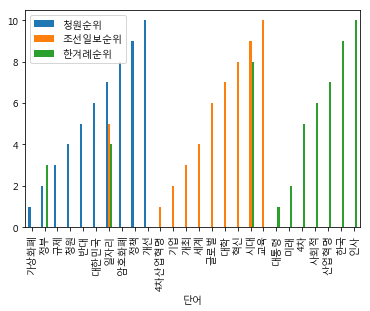

In [86]:
plt.figure(figsize =(15, 10))
dfrank.plot.bar()
plt.show()

<Figure size 1080x720 with 0 Axes>

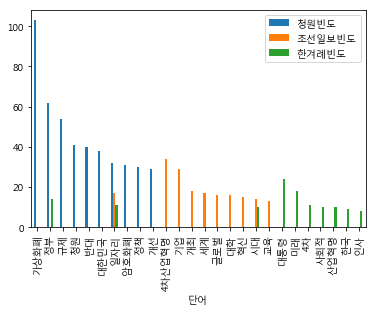

In [87]:
plt.figure(figsize =(15, 10))
dfnum.plot.bar()
plt.show()

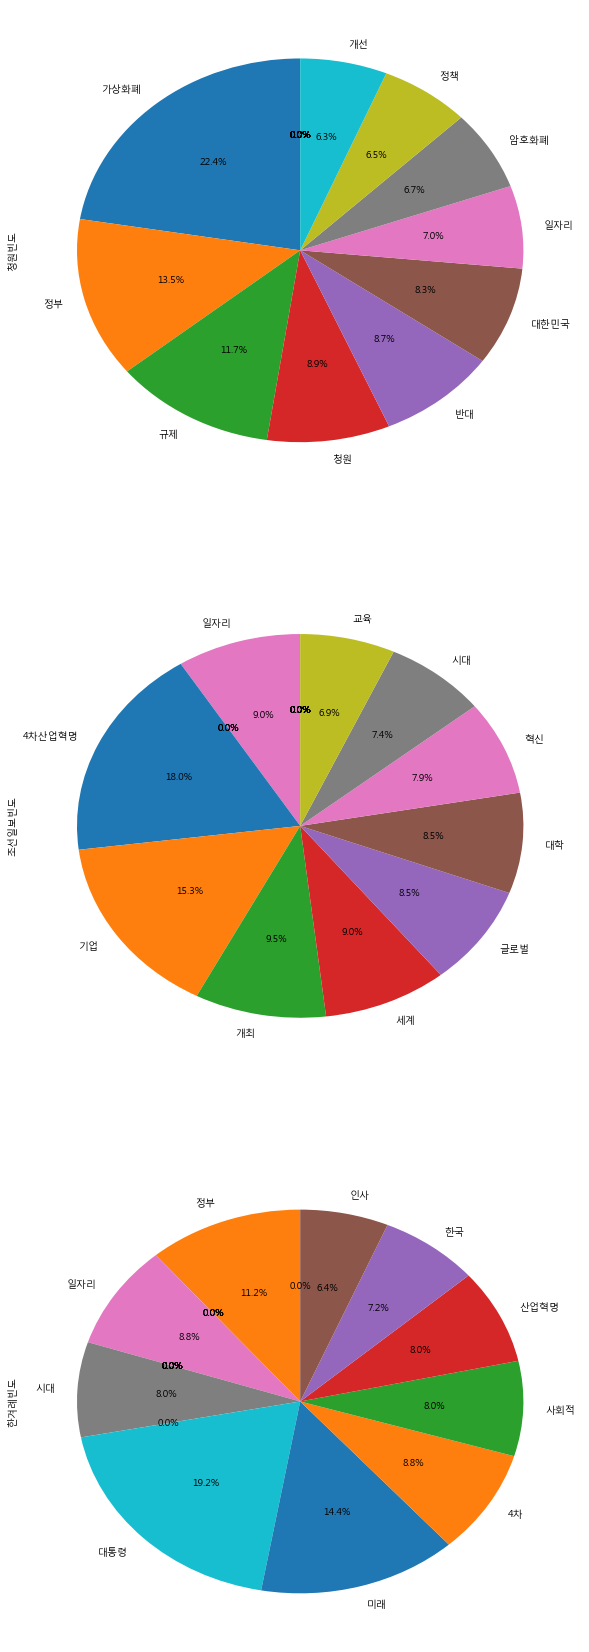

In [89]:
plt.figure(figsize=(10, 30))
plt.subplot(311)
label = dfall["단어"]
dfall["청원빈도"].plot.pie(labels = label, autopct = "%1.1f%%", startangle=90)


plt.subplot(312)
label = dfall["단어"]
dfall["조선일보빈도"].plot.pie(labels = label, autopct = "%1.1f%%", startangle=90)


plt.subplot(313)
label = dfall["단어"]
dfall["한겨례빈도"].plot.pie(labels = label, autopct = "%1.1f%%", startangle=90)

plt.show()
